In [541]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans  
from sklearn.metrics import silhouette_score

#import io
#from google.colab import files
#uploaded = files.upload()
#data = pd.read_csv(io.BytesIO(uploaded['k-means.csv']))

In [542]:
myData = pd.read_csv('k-means.csv', header = None, sep = '\t')
myData

,0,1
0,"1,84207953112616","4,60757160448228"
1,"5,65858312061882","4,79996405444154"
2,"6,35257892020234","3,29085449875427"
3,"2,90401652528136","4,61220411281507"
4,"3,23197915720744","4,93989405282630"
...,...,...
295,"7,30278708280303","3,38015978852108"
296,"6,99198434061175","2,98706728722547"
297,"4,82553409551138","2,77961663918051"
298,"6,11768055015372","2,85475655216480"


In [549]:
for id, row in myData.iterrows():
    row[0]=float (row[0].replace(',','.'))
    row[1]=float (row[1].replace(',','.'))
myData

,0,1
0,1.84208,4.60757
1,5.65858,4.79996
2,6.35258,3.29085
3,2.90402,4.6122
4,3.23198,4.93989
...,...,...
295,7.30279,3.38016
296,6.99198,2.98707
297,4.82553,2.77962
298,6.11768,2.85476


In [551]:
C = 3 
Sentinel = 0
its = 10
dtValues = myData.values

In [552]:
def setZ(l,C):
  return np.zeros((C, l))

In [553]:
def dist():
  mint = np.inf 
  return mint

In [554]:
def v(val):
  return val.shape

In [533]:
def CClose(val, cnt):
    dDClose = np.zeros([val.shape[0], 1])
    C = cnt.shape[0]
    b = val.shape[0] 
    
    for i in range(b):
        close = -1
        d = dist()

        for j in range(C):
            minD = np.sum((val[i] - cnt[j]) ** 2)

            if minD < d:
              d = minD
              close = j
        
        dDClose[i] = close

    return dDClose

In [534]:
def centMean(val, dDClose, C):
    b, l = v(val)
    cnt = setZ(l,C)
   
    for j in range(C):
        nK = np.sum(dDClose == j)  
        funJ = (1 / nK) * np.sum((val * (dDClose == j).astype(int)), axis = Sentinel)
        cnt[j] = funJ

    return cnt

In [545]:
def thePoints(grp, val1, val2, val3):
    grp.scatter(val1[:,0], val1[:,1],  edgecolors="#FF6347", facecolors="none")
    grp.scatter(val2[:,0], val2[:,1],  edgecolors="#00FA9A", facecolors="none")
    grp.scatter(val3[:,0], val3[:,1],  edgecolors="#6495ED", facecolors="none")
    grp.legend()

In [555]:
def myGraph(dDClose, cs, terminated=False):
    val1 = dtValues[np.where(dDClose == 0)[0]]
    val2 = dtValues[np.where(dDClose == 1)[0]]
    val3 = dtValues[np.where(dDClose == 2)[0]]

    fig, grp = plt.subplots()
    thePoints(grp, val1, val2, val3)

    plt.plot(cs[:, :, 0], cs[:, :, 1], 'X-', c = '#FF1493')   
    plt.show()

In [547]:
def kMeansFun(val, inC, its, plot_progress=False):
    b, l = v(val)
    C = inC.shape[Sentinel]
    dDClose = np.zeros([b, 1])
    myCent = inC

    cs = np.zeros([its + 1, inC.shape[0], inC.shape[1]])
    cs[Sentinel] = inC

    print('First:')
    myGraph(dDClose, cs)
    # Here i assigne values to closest centroid on each itteration 
    # then update the mean 
    for i in range(its):
        dDClose = CClose(val, myCent)
        myCent = centMean(val, dDClose, C)
        cs[i + 1] = myCent
    
        print('Iteration: ', i + 1)
        myGraph(dDClose, cs)
        
    return myCent, dDClose

No handles with labels found to put in legend.


First:


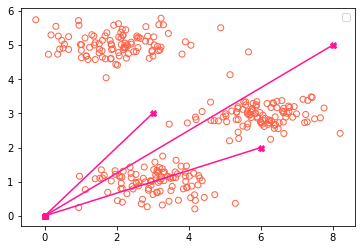

Iteration:  1


No handles with labels found to put in legend.


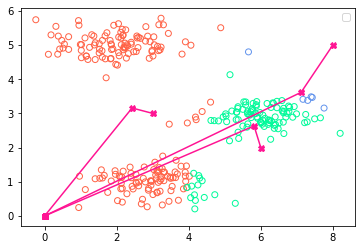

Iteration:  2


No handles with labels found to put in legend.


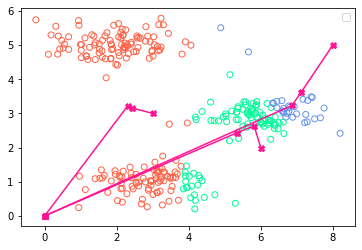

No handles with labels found to put in legend.


Iteration:  3


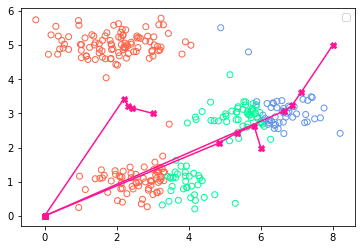

Iteration:  4


No handles with labels found to put in legend.


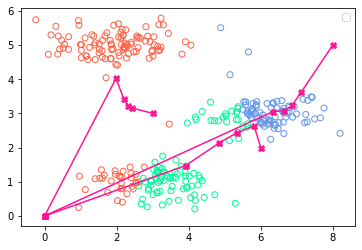

Iteration:  5


No handles with labels found to put in legend.


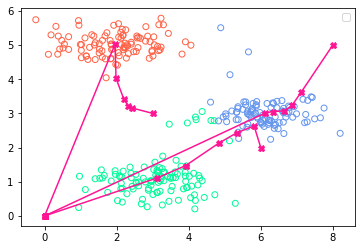

Iteration:  6


No handles with labels found to put in legend.


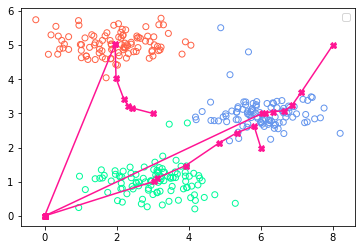

No handles with labels found to put in legend.


Iteration:  7


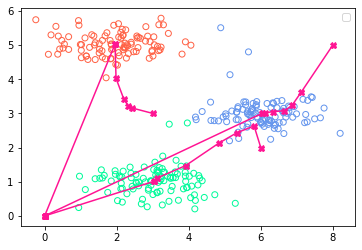

Iteration:  8


No handles with labels found to put in legend.


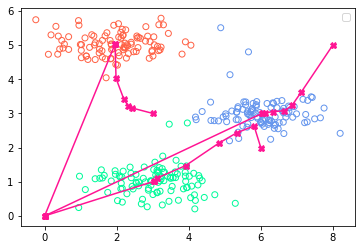

Iteration:  9


No handles with labels found to put in legend.


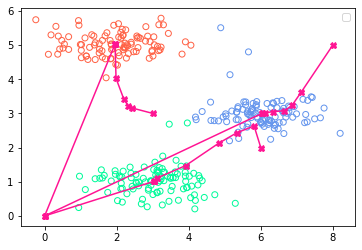

Iteration:  10


No handles with labels found to put in legend.


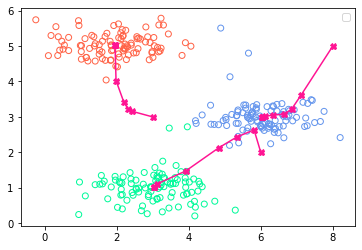

In [548]:
inCent = np.array([[3,3],[6,2],[8,5]])
centroids = centMean(dtValues, CClose(dtValues, inCent), C)
centroids = kMeansFun(dtValues, inCent, its)

In [630]:
val = KMeans(n_clusters = 3)
prdV = val.fit_predict(dtValues)

print(prdV)

[1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1]


In [631]:
val.predict([[0, 3], [5, 2]])

array([1, 2], dtype=int32)

In [632]:
val.predict([[1, 1], [5, 2]])

array([0, 2], dtype=int32)

In [633]:
val.predict([[5,2], [ 2, 9]])

array([2, 1], dtype=int32)

In [634]:
val.predict([[5,3], [ 3, 3]])

array([2, 0], dtype=int32)

In [635]:
val.predict([[6, 1], [2, 8]])

array([2, 1], dtype=int32)

In [636]:
for n_clusters in range(2,11):
    clst = KMeans(n_clusters = n_clusters).fit(dtValues)
    dex = clst.predict(dtValues)

    score = silhouette_score(dtValues, dex, metric='euclidean')
    print(n_clusters, score)

2 0.547631974589349
3 0.6900993728779541
4 0.6057663995248568
5 0.5123051836689333
6 0.4498011057113261
7 0.4427529074824275
8 0.42301832227869807
9 0.4196948518288474
10 0.4132283052567711
